# NLP



le dataset **'National Anthems of the World'** de kaggle.
Cette dataset contient 5 variables:


*   Country: Le nom du pays
*   Alpha-2: Le code à deux lettres utilisé pour représenter de manière unique chaque pays
*   Alpha-3: Le code à trois lettres utilisé pour représenter de manière unique chaque pays
*   Continent: Le continent du pays
*   Anthem: L'hymne national du pays

Le but de ce mini-projet est d'effectuer du partitionnement sur la variable "Anthem".

Donc:

*   Target: la variable Continent
*   Features: la variable Anthem


# Partie A: MODELE DE CLASSIFICATION

## Importation des bibliothèques requises

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import string

## Read data set

In [106]:
data=pd.read_csv("anthems.csv")
data

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = pd.DataFrame(TfidfVectorizer(max_features=1000).fit_transform(data['Anthem']).toarray())
x.index=data.Country
x.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Country,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.090829,0.0,0.198914,0.00000,0.050097,0.0,0.0,0.0,0.0
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133279,0.000000,0.0,...,0.0,0.000000,0.0,0.142645,0.00000,0.000000,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138542,0.0,...,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.06198,0.000000,0.0,0.0,0.0,0.0
Belarus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.097044,0.00000,0.000000,0.0,0.0,0.0,0.0


In [82]:
#on a que 3768 mots

In [107]:
data.columns

Index(['Country', 'Alpha-2', 'Alpha-3', 'Continent', 'Anthem'], dtype='object')

In [108]:
data.describe()

,Country,Alpha-2,Alpha-3,Continent,Anthem
count,190,189,190,190,190
unique,190,188,190,6,188
top,Albania,CH,ALB,Africa,"Arise, ye who refuse to be slaves; With our ve..."
freq,1,2,1,56,2


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB


<AxesSubplot:ylabel='Continent'>

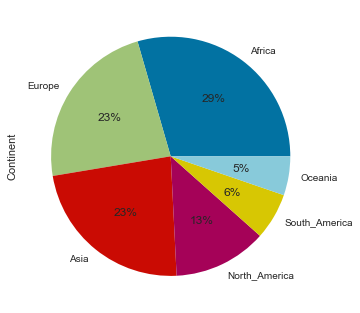

In [110]:
#Représenter la répartition des données selon la variable "Continent" sous forme 'pie chart'
data.Continent.value_counts(normalize=True).plot(kind="pie", autopct='%1.0f%%')
#Africa a la plus grande valeur avec 29%

<AxesSubplot:xlabel='count', ylabel='Continent'>

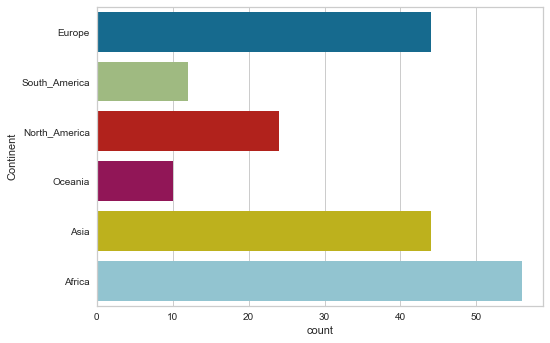

In [111]:
#Représenter la répartition des données selon la variable "Continent" sous forme 'plot'
sns.countplot(y = "Continent", data = data)

## Prétraitement des données

Le pre-processing est une étape de travail de traitement des données. Il consiste à nettoyer, normaliser et transformer les données brutes avant de les utiliser dans des tâches d'apprentissage automatique ou d'analyse de données. Le prétraitement vise à améliorer la qualité des données, à réduire le bruit, à supprimer les valeurs aberrantes et à les rendre adaptées à une utilisation ultérieure (la vectorisation, la classification....)

### Simple cleaning

In [112]:
def clean_text(text):

    # lowers
    text = text.lower()
    # removes special chars
    text = re.sub(r'\W|_', ' ', text)
    # removes digits
    text = re.sub(r'[0-9]', '', text)
    # removes multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # removes space at the start or end of the string
    text = re.sub(r'^\s|\s$', '', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    return text


In [113]:
# Apply clean_text to the 'Anthem' column
data['Anthem'] = data['Anthem'].apply(clean_text)
data['Anthem']

0      around our flag we stand united with one wish ...
1      our fatherland free independent that has for c...
2      land of mountains land by the river land of fi...
3      azerbaijan azerbaijan the glorious fatherland ...
4      we belarusians are peaceful people wholehearte...
                             ...                        
185    o defenders of the homeland rally around to th...
186    oh uganda may god uphold thee we lay our futur...
187    o sons of the sahara in the battlefield you ar...
188    stand and sing of zambia proud and free land o...
189    oh lift high the banner the flag of zimbabwe t...
Name: Anthem, Length: 190, dtype: object

### Text Punctuation

In [114]:
# Function to remove punctuation from text
def remove_punctuation(text):
    # Remove punctuation characters from the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Return the text without punctuation
    return text

In [115]:
# Apply punctuation removal to the 'Anthem' column
data['Anthem'] = data['Anthem'].apply(remove_punctuation)
data['Anthem']

0      around our flag we stand united with one wish ...
1      our fatherland free independent that has for c...
2      land of mountains land by the river land of fi...
3      azerbaijan azerbaijan the glorious fatherland ...
4      we belarusians are peaceful people wholehearte...
                             ...                        
185    o defenders of the homeland rally around to th...
186    oh uganda may god uphold thee we lay our futur...
187    o sons of the sahara in the battlefield you ar...
188    stand and sing of zambia proud and free land o...
189    oh lift high the banner the flag of zimbabwe t...
Name: Anthem, Length: 190, dtype: object

In [116]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sambe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sambe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sambe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lemmatisation

Pour analyser le sens d'un mot.
*   **Lemmatisation** utilise le contexte dans lequel le mot est utilisé

In [117]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokeniser le texte en mots
    tokens = word_tokenize(text)
    # Lemmatiser chaque mot dans les tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Rejoindre les tokens lemmatisés en une chaîne de caractères
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Retourner le texte lemmatisé
    return lemmatized_text

In [118]:
# Apply lemmatize_text to the 'Anthem' column
data['Anthem'] = data['Anthem'].apply(lemmatize_text)
data['Anthem']

0      around our flag we stand united with one wish ...
1      our fatherland free independent that ha for ce...
2      land of mountain land by the river land of fie...
3      azerbaijan azerbaijan the glorious fatherland ...
4      we belarusian are peaceful people wholehearted...
                             ...                        
185    o defender of the homeland rally around to the...
186    oh uganda may god uphold thee we lay our futur...
187    o son of the sahara in the battlefield you are...
188    stand and sing of zambia proud and free land o...
189    oh lift high the banner the flag of zimbabwe t...
Name: Anthem, Length: 190, dtype: object

### Text Stop words

In [119]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [120]:
stop_words = set(stopwords.words('english'))

#Function to remove stopwords from text
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords from the tokens
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # Join the filtered tokens into a string
    filtered_text = ' '.join(filtered_tokens)
    # Return the filtered text
    return filtered_text


In [121]:
# Apply stop words to the 'Anthem' column
data['Anthem'] = data['Anthem'].apply(remove_stopwords)
data['Anthem']

0      around flag stand united one wish one goal sac...
1      fatherland free independent ha century lived s...
2      land mountain land river land field land cathe...
3      azerbaijan azerbaijan glorious fatherland valo...
4      belarusian peaceful people wholeheartedly devo...
                             ...                        
185    defender homeland rally around glory time bloo...
186    oh uganda may god uphold thee lay future thy h...
187    son sahara battlefield torch holder long road ...
188    stand sing zambia proud free land work joy uni...
189    oh lift high banner flag zimbabwe symbol freed...
Name: Anthem, Length: 190, dtype: object

### Tokenisation

La tokenisation est le processus de division d'un texte en unités plus petites appelées "tokens". La tokenisation est une étape fondamentale dans le traitement du langage naturel car elle permet de préparer les données textuelles pour l'analyse.

In [122]:
def tokenize(text):
    tokens= word_tokenize(text)
    return tokens

In [123]:
# Apply tokenize to the 'Anthem' column
data['Anthem'] = data['Anthem'].apply(tokenize)
data['Anthem']

0      [around, flag, stand, united, one, wish, one, ...
1      [fatherland, free, independent, ha, century, l...
2      [land, mountain, land, river, land, field, lan...
3      [azerbaijan, azerbaijan, glorious, fatherland,...
4      [belarusian, peaceful, people, wholeheartedly,...
                             ...                        
185    [defender, homeland, rally, around, glory, tim...
186    [oh, uganda, may, god, uphold, thee, lay, futu...
187    [son, sahara, battlefield, torch, holder, long...
188    [stand, sing, zambia, proud, free, land, work,...
189    [oh, lift, high, banner, flag, zimbabwe, symbo...
Name: Anthem, Length: 190, dtype: object

### Vectorisation

La vectorisation est le processus de conversion de données non structurées ou non tabulaires en représentations vectorielles. Cela permet d'exploiter les techniques d'apprentissage automatique qui requièrent des entrées sous forme de vecteurs numériques. Il existe plusieurs méthodes de vectorisation telles que: Bag-of-Words (BoW), TF-IDF, Word Embeddings (Word2Vec, GloVe...), Bag-of-Concepts ect....

**TF-IDF**

Le TF-IDF est une méthode de calcul générée par un algorithme de moteur de recherche permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus.
Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. Il varie également en fonction de la fréquence du mot dans le corpus

TF-IDF est une mesure de l'importance du terme dans l'ensemble du corpus

In [124]:
data['Anthem'] = data['Anthem'].apply(lambda x: ' '.join(x))

In [125]:
data['Anthem']

0      around flag stand united one wish one goal sac...
1      fatherland free independent ha century lived s...
2      land mountain land river land field land cathe...
3      azerbaijan azerbaijan glorious fatherland valo...
4      belarusian peaceful people wholeheartedly devo...
                             ...                        
185    defender homeland rally around glory time bloo...
186    oh uganda may god uphold thee lay future thy h...
187    son sahara battlefield torch holder long road ...
188    stand sing zambia proud free land work joy uni...
189    oh lift high banner flag zimbabwe symbol freed...
Name: Anthem, Length: 190, dtype: object

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(data['Anthem'])
# x contient TF-IDF vectorized de la colomne 'Anthem'

In [128]:
pd.DataFrame(x.toarray())

,0,1,2,3,4,5,6,7,8,9,...,3321,3322,3323,3324,3325,3326,3327,3328,3329,3330
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.149911,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.094711,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
186,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
187,0.096108,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
188,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


Séparer les données en un jeu d'entraînement et un jeu de test:


*   **training data: 80%**
*   **test data: 20%**

In [129]:
from sklearn.model_selection import train_test_split
y = data['Continent']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Classification

La classification supervisée est une technique d'apprentissage automatique qui consiste à entraîner un modèle à partir d'un ensemble de données étiquetées, dans le but de prédire la classe ou la catégorie d'un nouvel échantillon non étiqueté.

L'objectif de la classification supervisée est de construire un modèle qui puisse généraliser à de nouveaux exemples et attribuer correctement les étiquettes de classe correspondantes.

Il existe plusieurs algorithmes de machine learning qui permettent de faire de la classification tels que : le SVM, le Random Forest, la régression logistique,etc

**SVM**

SVM est un ensemble de techniques d'apprentissage supervisé destinées à résoudre des problèmes de discriminationnote 1 et de régression. Les SVM sont une généralisation des classifieurs linéaires.

In [130]:
from sklearn import svm
#Créer et entraîner le modèle SVM sur les données d'apprentissage
svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
svm_model.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [131]:
# Prédire les continents des pays dans l'ensemble de test
y_predict = svm_model.predict(X_test)

In [132]:
from sklearn.metrics import classification_report
# Évaluer la performance du modèle
print(classification_report(y_test, y_predict))

               precision    recall  f1-score   support

       Africa       0.35      1.00      0.52         8
         Asia       1.00      0.42      0.59        12
       Europe       0.60      0.67      0.63         9
North_America       0.00      0.00      0.00         7
      Oceania       0.00      0.00      0.00         1
South_America       0.00      0.00      0.00         1

     accuracy                           0.50        38
    macro avg       0.32      0.35      0.29        38
 weighted avg       0.53      0.50      0.44        38



C:\Users\sambe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
from sklearn.metrics import *
print ("SVM Model")
print( "Precision", precision_score(y_test, y_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_predict, average='weighted'))
print( "F1 score: ",f1_score(y_test, y_predict, average='weighted'))

SVM Model
Precision 0.5311212814645309
Recall: 0.5
F1 score:  0.4440017450997913


C:\Users\sambe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   Precision (précision) : 0.5311212814645309

La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle. Dans ce cas, cela signifie que le modèle a correctement prédit environ 53.11% des pays parmi ceux qu'il a identifiés comme appartenant à un continent spécifique.

*   Recall (rappel) : 0.5

Le rappel mesure la proportion de prédictions positives correctes parmi tous les exemples réels qui appartiennent à la classe spécifique. Ici, cela signifie que le modèle a réussi à identifier environ 50% des pays qui réellement appartiennent à un certain continent.

*   F1 score : 0.4440017450997913

Le score F1 est une mesure combinée de la précision et du rappel. Il fournit une évaluation globale des performances du modèle en tenant compte des deux métriques. Une valeur élevée du score F1 indique une performance globalement meilleure du modèle. Dans ce cas, le modèle a un score F1 d'environ 0.44, ce qui indique que la performance globale du modèle peut être améliorée.


# Partie B: Partitionnement en k-moyennes

## Importation des bibliothèques requises

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [142]:
#Créez une copie du dataframe original avec les colonnes pertinentes pour le partitionnement ('Anthem', 'Continent')
data_kmeans = data[['Anthem', 'Continent']]
data_kmeans

,Anthem,Continent
0,around flag stand united one wish one goal sac...,Europe
1,fatherland free independent ha century lived s...,Europe
2,land mountain land river land field land cathe...,Europe
3,azerbaijan azerbaijan glorious fatherland valo...,Europe
4,belarusian peaceful people wholeheartedly devo...,Europe
...,...,...
185,defender homeland rally around glory time bloo...,Africa
186,oh uganda may god uphold thee lay future thy h...,Africa
187,son sahara battlefield torch holder long road ...,Africa
188,stand sing zambia proud free land work joy uni...,Africa


In [143]:
# Prétraitement des textes
punctuation = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.lower() not in punctuation]
    return ' '.join(tokens)


In [151]:
#Appliquer preprocess_text sur la column 'Anthem'
data_kmeans_copy = data_kmeans.copy()
data_kmeans_copy.loc[:, 'Anthem'] = data_kmeans_copy['Anthem'].apply(preprocess_text)

In [152]:
#Vectorisation de la column 'Anthem' avec tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data_kmeans['Anthem'])

In [153]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09610751, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Kmeans

K-means est un algorithme de partitionnement de données non supervisé utilisé pour regrouper un ensemble de données en K clusters distincts

* Appliquer l'algorithme kmeans pour différents valeur de K

In [155]:
data_kmeans_copy.index=data.Country
data_kmeans_copy.head()


,Anthem,Continent
Country,,
Albania,around flag stand united one wish one goal sac...,Europe
Armenia,fatherland free independent ha century lived s...,Europe
Austria,land mountain land river land field land cathe...,Europe
Azerbaijan,azerbaijan azerbaijan glorious fatherland valo...,Europe
Belarus,belarusian peaceful people wholeheartedly devo...,Europe


In [157]:
X.shape

(190, 3331)

In [161]:
#Appliquer le PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X.toarray())
X_pca.shape

(190, 182)

In [162]:
182/3330 #5% des variables contiennent 99% de l'inertie (information)

0.054654654654654654

In [168]:
# Liste des valeurs de k à tester
k = 5

# Appliquer l'algorithme des k-moyennes pour k=5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_pca)
data_kmeans_copy["cluster"] = kmeans.labels_
data_kmeans_copy.head(10)


C:\Users\sambe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Anthem,Continent,cluster
Country,,,
Albania,around flag stand united one wish one goal sac...,Europe,0
Armenia,fatherland free independent ha century lived s...,Europe,1
Austria,land mountain land river land field land cathe...,Europe,0
Azerbaijan,azerbaijan azerbaijan glorious fatherland valo...,Europe,2
Belarus,belarusian peaceful people wholeheartedly devo...,Europe,3
Belgium,dear belgium holy land father ã â â œ soul hea...,Europe,0
Bosnia and Herzegovina,light soul eternal fire flame mother land bosn...,Europe,3
Bulgaria,proud balkan mountain next danube sparkle sun ...,Europe,3
Croatia,beautiful homeland oh fearless gracious father...,Europe,0


In [169]:
data_kmeans_copy.cluster.value_counts(normalize=True)

0    0.578947
3    0.152632
2    0.131579
1    0.094737
4    0.042105
Name: cluster, dtype: float64

In [170]:
data_kmeans_copy.query('cluster==4')

,Anthem,Continent,cluster
Country,,,
Lithuania,lithuania dear homeland land worthy hero may s...,Europe,4
Portugal,hero sea noble people valiant immortal nation ...,Europe,4
Russian Federation (the),russia ã â â œ holy nation russia ã â â œ belo...,Europe,4
Chile,beloved homeland receive vow chile gave altar ...,South_America,4
Dominican Republic,brave let raise song vivid emotion world face ...,North_America,4
Panama,last reached victory joyous field union ardent...,North_America,4
Palestine,warrior warrior warrior oh land land ancestor ...,Asia,4
Western Sahara,son sahara battlefield torch holder long road ...,Africa,4


Dans chaque graphique, nous observons la distribution des clusters de chaque k (nombre de clusters).

Chaque cluster représente un groupe de similarité dans les données, où les observations au sein d'un même cluster sont plus similaires les unes aux autres qu'aux observations des autres clusters.

Exemple dans la figure 1 : Clusters de k-means pour k=2, notre donnée est regroupé dans 2 clusters en basant sur la similarité entre les données.

### Méthode du coude

La méthode du coude (elbow method) est une technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de regroupement (clustering). Elle repose sur l'idée que l'ajout de clusters supplémentaires améliore la performance du modèle, mais seulement jusqu'à un certain point. Au-delà de ce point, l'ajout de clusters n'apporte pas beaucoup d'avantages significatifs.

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

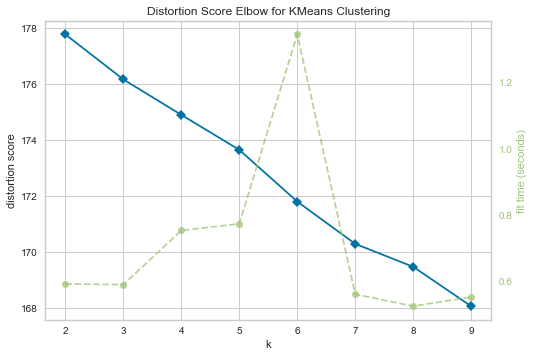

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [164]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Méthode du coude
elbow_visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
elbow_visualizer.fit(X_pca)
elbow_visualizer.show()

**SSE**

L'interprétation de la méthode du coude se fait à partir du graphique de la somme des carrés des distances (SSE) en fonction du nombre de clusters. La SSE mesure la dispersion des points par rapport à leurs centres de cluster respectifs. Plus la SSE est faible, plus les points sont regroupés de manière compacte et cohérente.

Lorsque k augmente, la SSE diminue car chaque cluster peut mieux s'ajuster aux points qui lui sont assignés. Cependant, il y a un point à partir duquel l'amélioration de la SSE devient moins significative. Ce point est appelé le "coude".

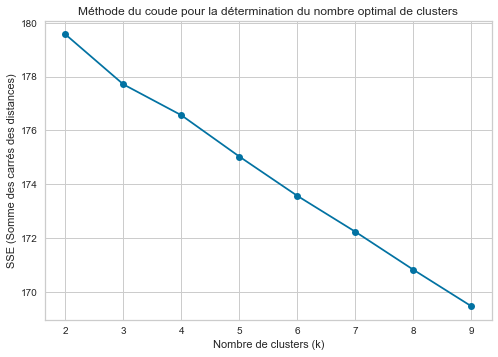

In [35]:
#autre méthode pour appliquer la méthode de courde
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste des valeurs de k à tester
k_values = range(2, 10)

# Calculer la SSE pour chaque valeur de k
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Tracer le graphique de la SSE en fonction de k
plt.plot(k_values, sse, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('SSE (Somme des carrés des distances)')
plt.title('Méthode du coude pour la détermination du nombre optimal de clusters')
plt.show()


**==> D'après le graphique le nombre optimal de cluster à l'aide de la méthode coude est 2**

### Méthode silhouette

La méthode de la silhouette est une mesure de la cohésion et de la séparation des clusters dans un ensemble de données. Elle peut être utilisée pour déterminer le nombre optimal de clusters.
Le coefficient de silhouette est une mesure de la similitude d’un point de données à l’intérieur d’un cluster par rapport à d’autres clusters.

Le coefficient de silhouette varie de -1 à 1. Une valeur proche de 1 indique que les points sont bien regroupés au sein de leur cluster et sont loin des autres clusters. Une valeur proche de 0 indique un chevauchement entre les clusters ou que les points sont proches des frontières entre les clusters. Une valeur proche de -1 indique que les points sont mal attribués à leurs clusters et seraient mieux placés dans d'autres clusters.

Pour déterminer le **nombre optimal de clusters**, nous recherchons le **plus grand coefficient de silhouette** moyen. Cela correspond au nombre de clusters qui donne une séparation optimale des points et une cohésion élevée au sein des clusters. Dans le graphique, nous examinons le coefficient de silhouette moyen pour différentes valeurs de k. Nous recherchons le **pic le plus élevé**, ce qui **indique** le **nombre optimal de clusters**

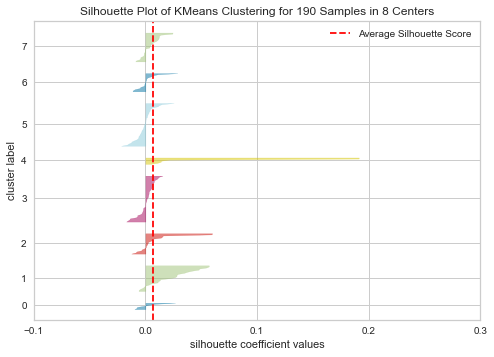

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 190 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# Méthode silhouette
silhouette_visualizer = SilhouetteVisualizer(KMeans(), colors='yellowbrick')
silhouette_visualizer.fit(X)
silhouette_visualizer.show()

 Le nombre optimal de clusters à l'aide de la méthode silhouette est celui qui correspond au coefficient de silhouette maximum.
 D'après le graphique, le coefficient de silhouette maximum correspondant au nombre de cluster égale à 2.

**==> Nombre optimal de cluster = 2**

### Kmeans avec nombre optimal du cluster

In [62]:
#Effectuer Kmeans avec nombre optimal du cluster : k=2
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X)
labels = kmeans_model.labels_
data_kmeans['cluster'] = labels



*  **Ajouter au dataset original une variable “cluster“ indiquant pour chaque observation le cluster auquel elle appartient.**

In [63]:
#Extraire le cluster
labels = kmeans_model.labels_

In [64]:
#Ajouter le label du cluster dans la colonne 'cluster'
data_kmeans['cluster'] = labels


In [65]:
#Afficher la nouvelle dataframe après l'ajout de la variable cluster
data_kmeans

,Anthem,Continent,cluster,PCA1,PCA2
0,around flag stand united one wish one goal sac...,Europe,1,-0.087064,-0.035292
1,fatherland free independent ha century lived s...,Europe,1,-0.117683,0.037412
2,land mountain land river land field land cathe...,Europe,1,0.067752,-0.056414
3,azerbaijan azerbaijan glorious fatherland valo...,Europe,1,0.336293,0.055069
4,belarusian peaceful people wholeheartedly devo...,Europe,1,-0.078619,-0.081939
...,...,...,...,...,...
185,defender homeland rally around glory time bloo...,Africa,1,-0.081176,-0.054401
186,oh uganda may god uphold thee lay future thy h...,Africa,1,0.102316,-0.050504
187,son sahara battlefield torch holder long road ...,Africa,1,-0.101545,0.099991
188,stand sing zambia proud free land work joy uni...,Africa,1,-0.017406,0.145950


### PCA

PCA est une technique d'analyse de données utilisée pour réduire la dimensionnalité des données tout en conservant autant d'informations que possible. L'objectif principal de la PCA est de transformer un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées appelées composantes principales.


**1.  Réalisez une réduction de dimension avec l'analyse en composantes principales (PCA) pour visualiser les clusters dans un plan**


In [41]:
#Appliquer le PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
data_kmeans['PCA1'] = X_pca[:, 0]
data_kmeans['PCA2'] = X_pca[:, 1]

C:\Users\sambe\AppData\Local\Temp\ipykernel_22176\3166771946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmeans['PCA1'] = X_pca[:, 0]



**2.   Tracez un graphique avec les pays dans le plan des deux
premières composantes principales, en utilisant une couleur différente pour chaque cluster**

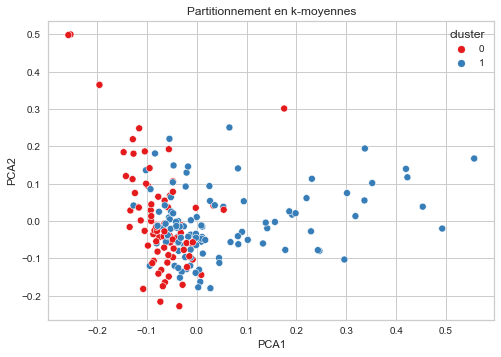

In [42]:
#Tracer le graphique
sns.scatterplot(data=data_kmeans, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Partitionnement en k-moyennes')
plt.show()

Ce graphique est représente les deux premières composantes principales avec clusters (cluster 0 et cluster 1)

### Nuage des mots: Mots fréquents

Un nuage de mots, également connu sous le nom de "word cloud" en anglais, est une représentation visuelle de données textuelles où les mots les plus fréquents dans un corpus de texte sont affichés de manière graphique. Les mots sont représentés sous forme de nuage, où la taille de chaque mot est proportionnelle à sa fréquence dans le texte.


**1.   Afficher les mots les plus fréquents dans chaque cluster avec un nuage de mots.**


In [43]:
from nltk import FreqDist
num_clusters=2
# Parcourez chaque cluster
for cluster_id in range(num_clusters):
    cluster_data = data_kmeans[data_kmeans['cluster'] == cluster_id]
    # Concaténez tous les textes du cluster
    cluster_text = ' '.join(cluster_data['Anthem'])
    # Divisez le texte en mots
    tokens = cluster_text.split()
    # Comptez la fréquence de chaque mot
    freq_dist = FreqDist(tokens)
    common_words = freq_dist.most_common(10)  # Récupérez les 10 mots les plus fréquents
    print(f"Cluster {cluster_id}: {common_words}")


Cluster 0: [('u', 158), ('let', 110), ('people', 76), ('glory', 73), ('may', 66), ('one', 61), ('freedom', 58), ('flag', 56), ('homeland', 56), ('free', 53)]
Cluster 1: [('land', 168), ('thy', 97), ('god', 95), ('u', 91), ('may', 88), ('thee', 73), ('love', 67), ('people', 58), ('nation', 57), ('free', 52)]


==> Nous avons afficher une liste contient les 10 mots les plus fréquents dans chaque cluster.
exemple dans le cluster 1 le mot le plus fréquent est 'u' avec 158 occurrences dans le cluster.
Dans le cluster 2 'land' est le plus fréquent avec 168 occurrences.


**2.   Représentation graphique des mots les plus fréquents dans chaque cluster avec un nuage de mots.**



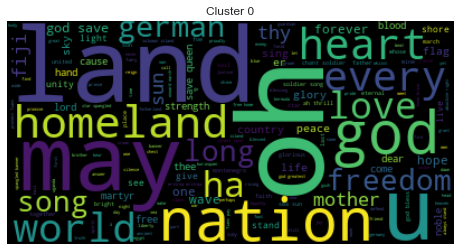

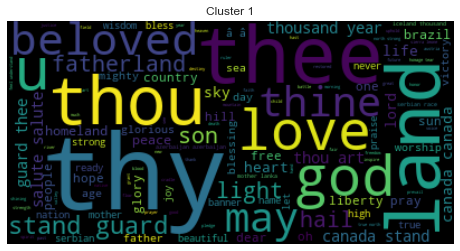

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Parcourez chaque cluster
for cluster_id in range(num_clusters):
    cluster_data = data_kmeans[data_kmeans['cluster'] == cluster_id]
    cluster_text = ' '.join(cluster_data['Anthem'])
    wordcloud = WordCloud().generate(cluster_text)

    # Affichage du nuage de mots
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster_id}")
    plt.show()


Le nuage de mots permet de mettre en évidence les mots les plus importants, les thèmes dominants ou les concepts clés présents dans le texte. Il est souvent utilisé pour analyser et visualiser les données textuelles de manière concise et intuitive.

Les mots sont représentés sous forme de nuage, où la taille de chaque mot est proportionnelle à sa fréquence dans le texte.

D'après le graphique:


*   Cluster 1: 'u', 'let', 'people' sont les 3 premiers mots les plus fréquents
*   Cluster 2: 'land', 'thy', 'god' sont les 3 premiers mots les plus fréquents



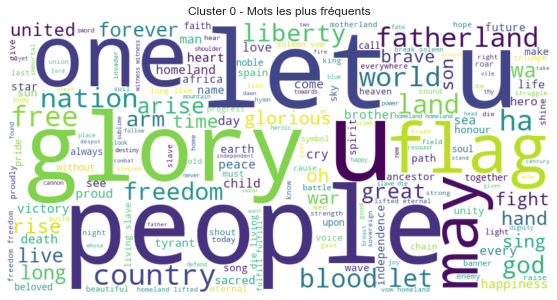

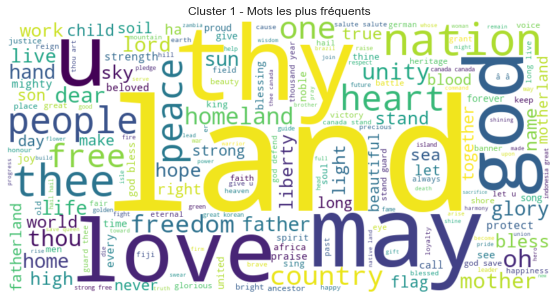

In [45]:
#Une autre représentation de nuage des mots dans chaque cluster
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Parcourez chaque cluster
for cluster_id in range(num_clusters):
    cluster_data = data_kmeans[data_kmeans['cluster'] == cluster_id]
    cluster_text = ' '.join(cluster_data['Anthem'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Affichage du nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_id} - Mots les plus fréquents")
    plt.axis('off')
    plt.show()


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

In [49]:
# Vectorisation avec la représentation Bag-of-Words (BoW)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Anthem'])
X

<190x3331 sparse matrix of type '<class 'numpy.int64'>'
	with 10561 stored elements in Compressed Sparse Row format>

In [50]:
# Construction de la matrice de similarité
similarity_matrix = sch.linkage(X.toarray(), method='ward')

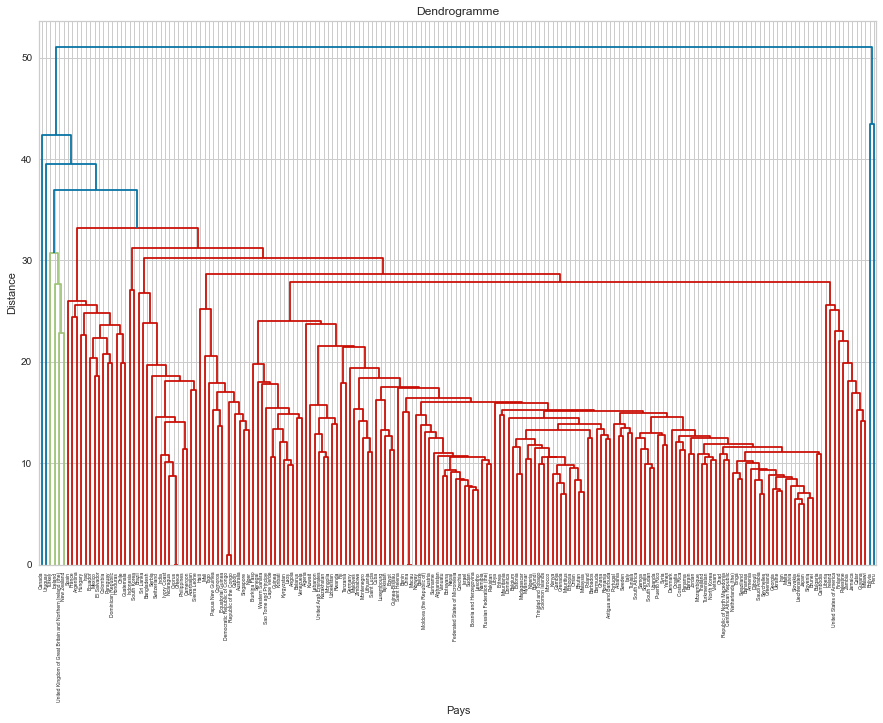

In [51]:
# Tracer le dendrogramme
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(similarity_matrix, labels=data['Country'].tolist(), leaf_rotation=90)
plt.title('Dendrogramme')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

### Représenter les pays sur une carte géographique avec une couleur par cluster.

In [69]:
#pip install geopandas

In [174]:
k = 2
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(X)
labels = kmeans_model.labels_
data_kmeans['cluster'] = labels


C:\Users\sambe\AppData\Local\Temp\ipykernel_22176\1127418414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kmeans['cluster'] = labels


C:\Users\sambe\AppData\Local\Temp\ipykernel_22176\4009690746.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


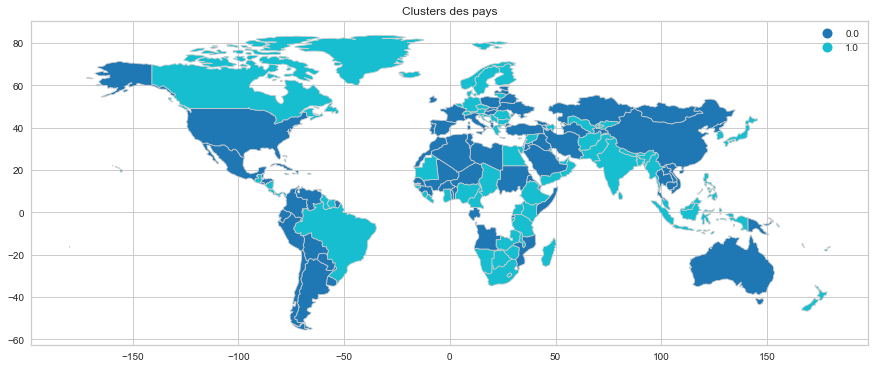

In [175]:
import geopandas as gpd
data['cluster']=data_kmeans["cluster"]
# Charger les données géographiques
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionner les données géographiques avec les données de cluster
merged = world.set_index('name').join(data.set_index('Country'))

# Tracer la carte avec les clusters colorés
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='cluster', categorical=True, legend=True, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Clusters des pays')
plt.show()

In [57]:
data

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,around flag stand united one wish one goal sac...
1,Armenia,AM,ARM,Europe,fatherland free independent ha century lived s...
2,Austria,AT,AUT,Europe,land mountain land river land field land cathe...
3,Azerbaijan,AZ,AZE,Europe,azerbaijan azerbaijan glorious fatherland valo...
4,Belarus,BY,BLR,Europe,belarusian peaceful people wholeheartedly devo...
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,defender homeland rally around glory time bloo...
186,Uganda,UG,UGA,Africa,oh uganda may god uphold thee lay future thy h...
187,Western Sahara,EH,ESH,Africa,son sahara battlefield torch holder long road ...
188,Zambia,ZM,ZMB,Africa,stand sing zambia proud free land work joy uni...


In [58]:
data_kmeans

,Anthem,Continent,cluster,PCA1,PCA2
0,around flag stand united one wish one goal sac...,Europe,0,-0.087064,-0.035292
1,fatherland free independent ha century lived s...,Europe,0,-0.117683,0.037412
2,land mountain land river land field land cathe...,Europe,1,0.067752,-0.056414
3,azerbaijan azerbaijan glorious fatherland valo...,Europe,1,0.336293,0.055069
4,belarusian peaceful people wholeheartedly devo...,Europe,0,-0.078619,-0.081939
...,...,...,...,...,...
185,defender homeland rally around glory time bloo...,Africa,0,-0.081176,-0.054401
186,oh uganda may god uphold thee lay future thy h...,Africa,1,0.102316,-0.050504
187,son sahara battlefield torch holder long road ...,Africa,0,-0.101545,0.099991
188,stand sing zambia proud free land work joy uni...,Africa,1,-0.017406,0.145950
